In [12]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os

# Load model

In [14]:
# https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

# Load data clean

In [15]:
# Load the CSV file into a DataFrame

df_de = pd.read_csv('https://raw.githubusercontent.com/svisel22/SS23-BIPM-Analytics-Lab---Group-4-repository/main/Preprocessing/data_clean/de_clean_1.csv')
df_en = pd.read_csv('https://raw.githubusercontent.com/svisel22/SS23-BIPM-Analytics-Lab---Group-4-repository/main/Preprocessing/data_clean/en_clean_1.csv')
df_es = pd.read_csv('https://raw.githubusercontent.com/svisel22/SS23-BIPM-Analytics-Lab---Group-4-repository/main/Preprocessing/data_clean/es_clean_1.csv')


### Hincapié fix

In [16]:
# Replace 'Piero Hincapié' with 'Piero Hincapie' in the 'player' column
df_es['player'] = df_es['player'].replace('piero hincapié', 'piero hincapie')
df_en['player'] = df_en['player'].replace('piero hincapié', 'piero hincapie')


# Load data d1.1

In [17]:
# Load the CSV file into a DataFrame
df_de_1 = pd.read_csv('https://raw.githubusercontent.com/svisel22/SS23-BIPM-Analytics-Lab---Group-4-repository/main/Preprocessing/data_clean/de_clean_1-1.csv')
df_en_1 = pd.read_csv('https://raw.githubusercontent.com/svisel22/SS23-BIPM-Analytics-Lab---Group-4-repository/main/Preprocessing/data_clean/en_clean_1-1.csv')
df_es_1 = pd.read_csv('https://raw.githubusercontent.com/svisel22/SS23-BIPM-Analytics-Lab---Group-4-repository/main/Preprocessing/data_clean/es_clean_1-1.csv')

# Load data condensed

In [18]:
# Load the CSV file into a DataFrame
df_de_con = pd.read_csv('https://raw.githubusercontent.com/svisel22/SS23-BIPM-Analytics-Lab---Group-4-repository/main/Preprocessing/data_clean/de_clean_condensed.csv')
df_en_con = pd.read_csv('https://raw.githubusercontent.com/svisel22/SS23-BIPM-Analytics-Lab---Group-4-repository/main/Preprocessing/data_clean/en_clean_condensed.csv')
df_es_con = pd.read_csv('https://raw.githubusercontent.com/svisel22/SS23-BIPM-Analytics-Lab---Group-4-repository/main/Preprocessing/data_clean/es_clean_condensed.csv')

# Sentiment Analysis with multilingual model

In [19]:
def sentiment_score(data):
    if isinstance(data, str):
        tokens = tokenizer.encode(data, return_tensors='pt')
        result = model(tokens)
        return int(torch.argmax(result.logits)) + 1
    else:
        return 0

## trying with the whole dataset data clean

In [20]:
df_de['sentiment'] = df_de['data'].apply(lambda x: sentiment_score(x[:512]))
df_en['sentiment'] = df_en['data'].apply(lambda x: sentiment_score(x[:512]))
df_es['sentiment'] = df_es['data'].apply(lambda x: sentiment_score(x[:512]))

In [21]:
# Grouping the data by 'player' and calculating the mean of 'sentiment' for each player
mean_sentiment_de = df_de.groupby('player')['sentiment'].mean()
mean_sentiment_en = df_en.groupby('player')['sentiment'].mean()
mean_sentiment_es = df_es.groupby('player')['sentiment'].mean()

print('Sentiment score per player DE')
print(mean_sentiment_de)
print('Sentiment score per player EN')
print(mean_sentiment_en)
print('Sentiment score per player ES')
print(mean_sentiment_es)

Sentiment score per player DE
player
exequiel palacios    3.030928
jeremie frimpong     3.094017
jonathan tah         3.033708
mitchel bakker       3.123711
moussa diaby         2.950820
mykhaylo mudryk      2.263158
piero hincapie       2.647059
Name: sentiment, dtype: float64
Sentiment score per player EN
player
exequiel palacios    2.714286
jeremie frimpong     2.941748
jonathan tah         3.000000
mitchel bakker       3.181818
moussa diaby         2.924138
mykhaylo mudryk      2.666667
piero hincapie       2.607143
Name: sentiment, dtype: float64
Sentiment score per player ES
player
exequiel palacios    2.886598
jeremie frimpong     3.173913
jonathan tah         2.666667
mitchel bakker       2.545455
moussa diaby         2.903226
mykhaylo mudryk      2.444444
piero hincapie       3.192308
Name: sentiment, dtype: float64


# Player sentence analysis

## data clean

In [22]:
def extract_sentence(df):
    df['short'] = ''
    
    for index, row in df.iterrows():
        player = row['player']
        data = str(row['data'])  # Convert data to string
        
        # Find the sentence containing player's information
        sentences = data.split('.')
        for sentence in sentences:
            if player.lower() in sentence.lower():
                df.at[index, 'short'] = sentence.strip()
                break
    
    return df

In [23]:
extract_sentence(df_de)
extract_sentence(df_en)
extract_sentence(df_es)

,data,player,language,publishedAt,sentiment,short
0,adeyemi firmo el que es su primer gol en lo qu...,exequiel palacios,es,2023-01-29T18:25:03Z,1,\n con florian wirtz dejando su lesion definit...
1,la ultima semana de marzo es la primera ventan...,exequiel palacios,es,2023-01-30T16:52:46Z,2,
2,gustavo puerta ya no jugara en el bayer leverk...,exequiel palacios,es,2023-01-31T20:41:38Z,1,"el club aleman, que siempre se ha caracterizad..."
3,alberto fernandez\n mauricio macri\n indec\n h...,exequiel palacios,es,2023-02-09T18:32:38Z,5,"\n el presidente de la afa, claudio \'chiqui\'..."
4,alberto fernandez\n mauricio macri\n indec\n h...,exequiel palacios,es,2023-02-12T21:13:55Z,2,\n tambien participaron los otros campeones de...
...,...,...,...,...,...,...
268,"antes del minuto, el visitante ya habia llegad...",piero hincapie,es,2023-05-11T21:13:48Z,1,"antes del minuto, el visitante ya habia llegad..."
269,el bayer leverkusen jugo de visita contra la r...,piero hincapie,es,2023-05-11T20:56:21Z,3,"el elenco aleman, del zaguero ecuatoriano pier..."
270,un ecuatoriano volvera a semifinales de un tor...,piero hincapie,es,2023-05-11T18:30:25Z,4,"esta vez, piero hincapie estara en esta instan..."
271,la seleccion de ecuador jugara sus dos ultimos...,piero hincapie,es,2023-05-10T23:37:55Z,3,en el cronograma que compartio la federacion e...


In [24]:
df_de['sentiment2'] = df_de['short'].apply(lambda x: sentiment_score(x[:512]))
df_en['sentiment2'] = df_en['short'].apply(lambda x: sentiment_score(x[:512]))
df_es['sentiment2'] = df_es['short'].apply(lambda x: sentiment_score(x[:512]))

In [25]:
# Grouping the data by 'player' and calculating the mean of 'sentiment' for each player
mean_sentiment_de = df_de.groupby('player')['sentiment2'].mean()
mean_sentiment_en = df_en.groupby('player')['sentiment2'].mean()
mean_sentiment_es = df_es.groupby('player')['sentiment2'].mean()

print('Sentiment score per player DE')
print(mean_sentiment_de)
print('Sentiment score per player EN')
print(mean_sentiment_en)
print('Sentiment score per player ES')
print(mean_sentiment_es)

Sentiment score per player DE
player
exequiel palacios    2.824742
jeremie frimpong     3.196581
jonathan tah         3.483146
mitchel bakker       2.835052
moussa diaby         3.319672
mykhaylo mudryk      2.684211
piero hincapie       2.729412
Name: sentiment2, dtype: float64
Sentiment score per player EN
player
exequiel palacios    2.178571
jeremie frimpong     3.553398
jonathan tah         3.857143
mitchel bakker       2.818182
moussa diaby         3.296552
mykhaylo mudryk      2.930556
piero hincapie       3.178571
Name: sentiment2, dtype: float64
Sentiment score per player ES
player
exequiel palacios    3.257732
jeremie frimpong     2.956522
jonathan tah         3.000000
mitchel bakker       2.454545
moussa diaby         2.548387
mykhaylo mudryk      2.370370
piero hincapie       3.102564
Name: sentiment2, dtype: float64


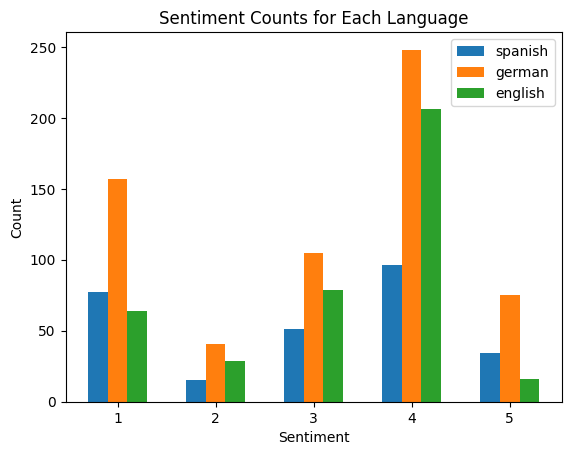

In [26]:
# Calculate the count of each sentiment category for each DataFrame
es_sentiment_counts = df_es['sentiment2'].value_counts().sort_index()
de_sentiment_counts = df_de['sentiment2'].value_counts().sort_index()
en_sentiment_counts = df_en['sentiment2'].value_counts().sort_index()

# Set the x-axis labels
sentiment_labels = ['1', '2', '3', '4', '5']
x = np.arange(len(sentiment_labels))

# Set the width of each bar
bar_width = 0.2

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the counts for each sentiment category for each DataFrame
ax.bar(x - bar_width, es_sentiment_counts, width=bar_width, label='spanish')
ax.bar(x, de_sentiment_counts, width=bar_width, label='german')
ax.bar(x + bar_width, en_sentiment_counts, width=bar_width, label='english')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(sentiment_labels)

# Set the plot title and labels
ax.set_title('Sentiment Counts for Each Language')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [27]:
df_combined = pd.concat([df_es, df_en, df_de])
df_combined

,data,player,language,publishedAt,sentiment,short,sentiment2
0,adeyemi firmo el que es su primer gol en lo qu...,exequiel palacios,es,2023-01-29T18:25:03Z,1,\n con florian wirtz dejando su lesion definit...,2
1,la ultima semana de marzo es la primera ventan...,exequiel palacios,es,2023-01-30T16:52:46Z,2,,4
2,gustavo puerta ya no jugara en el bayer leverk...,exequiel palacios,es,2023-01-31T20:41:38Z,1,"el club aleman, que siempre se ha caracterizad...",3
3,alberto fernandez\n mauricio macri\n indec\n h...,exequiel palacios,es,2023-02-09T18:32:38Z,5,"\n el presidente de la afa, claudio \'chiqui\'...",4
4,alberto fernandez\n mauricio macri\n indec\n h...,exequiel palacios,es,2023-02-12T21:13:55Z,2,\n tambien participaron los otros campeones de...,4
...,...,...,...,...,...,...,...
621,bayer leverkusen wehrt sich in der europa leag...,piero hincapie,de,2023-05-12T10:02:12Z,2,"sekunden waren gespielt, als robert andrich na...",1
622,xabi alonso hat im taktik-duell mit seinem alt...,piero hincapie,de,2023-05-11T21:17:00Z,4,"sekunden waren gespielt, als robert andrich na...",1
623,trotz der pleite im halbfinal-hinspiel bei der...,piero hincapie,de,2023-05-11T21:09:16Z,3,"sekunden waren gespielt, als robert andrich na...",1
624,nach dem hitzigen aufeinandertreffen im stadio...,piero hincapie,de,2023-05-11T20:58:58Z,4,"sekunden waren gespielt, als robert andrich na...",1


In [30]:
# Create the folder if it doesn't exist
folder_name = 'data'

# Define the file path for saving the CSV
file_name = 'data_sentiment.csv'
file_path = os.path.join(folder_name, file_name)

# Convert the dataframe to CSV and save it
df_combined.to_csv(file_path, index=False)

## data 1-1

In [31]:
extract_sentence(df_de_1)
extract_sentence(df_en_1)
extract_sentence(df_es_1)

,data,player,language,publishedAt,short
0,adeyemi firmo el que es su primer gol en lo qu...,palacios,es,2023-01-29T18:25:03Z,adeyemi firmo el que es su primer gol en lo qu...
1,"el club aleman, que siempre se ha caracterizad...",palacios,es,2023-01-31T20:41:38Z,"el club aleman, que siempre se ha caracterizad..."
2,"alberto fernandez el presidente de la afa, cl...",palacios,es,2023-02-09T18:32:38Z,"alberto fernandez el presidente de la afa, cl..."
3,alberto fernandez tambien participaron los ot...,palacios,es,2023-02-12T21:13:55Z,alberto fernandez tambien participaron los ot...
4,fue el momento en que desde las tribunas se de...,palacios,es,2023-02-13T01:05:15Z,fue el momento en que desde las tribunas se de...
...,...,...,...,...,...
232,"antes del minuto, el visitante ya habia llegad...",hincapie,es,2023-05-11T21:13:48Z,"antes del minuto, el visitante ya habia llegad..."
233,"el elenco aleman, del zaguero ecuatoriano hinc...",hincapie,es,2023-05-11T20:56:21Z,"el elenco aleman, del zaguero ecuatoriano hinc..."
234,"esta vez, hincapie estara en esta instancia de...",hincapie,es,2023-05-11T18:30:25Z,"esta vez, hincapie estara en esta instancia de..."
235,inicio el y finalizara el de mayo.en el cronog...,hincapie,es,2023-05-10T23:37:55Z,en el cronograma que compartio la federacion e...


In [32]:
df_de_1['sentiment'] = df_de_1['short'].apply(lambda x: sentiment_score(x[:512]))
df_en_1['sentiment'] = df_en_1['short'].apply(lambda x: sentiment_score(x[:512]))
df_es_1['sentiment'] = df_es_1['short'].apply(lambda x: sentiment_score(x[:512]))

In [33]:
# Grouping the data by 'player' and calculating the mean of 'sentiment' for each player
mean_sentiment_de_1 = df_de_1.groupby('player')['sentiment'].mean()
mean_sentiment_en_1 = df_en_1.groupby('player')['sentiment'].mean()
mean_sentiment_es_1 = df_es_1.groupby('player')['sentiment'].mean()

print('Sentiment score per player DE')
print(mean_sentiment_de_1)
print('Sentiment score per player EN')
print(mean_sentiment_en_1)
print('Sentiment score per player ES')
print(mean_sentiment_es_1)

Sentiment score per player DE
player
bakker      2.476190
diaby       3.083333
frimpong    3.204819
hincapie    2.800000
mudryk      2.722222
palacios    2.789474
tah         3.483333
Name: sentiment, dtype: float64
Sentiment score per player EN
player
bakker      2.222222
diaby       3.028302
frimpong    2.818182
hincapie    3.000000
mudryk      2.419355
palacios    2.000000
tah         3.142857
Name: sentiment, dtype: float64
Sentiment score per player ES
player
bakker      2.250000
diaby       2.666667
frimpong    3.318182
hincapie    3.186667
mudryk      2.416667
palacios    2.930556
tah         3.166667
Name: sentiment, dtype: float64


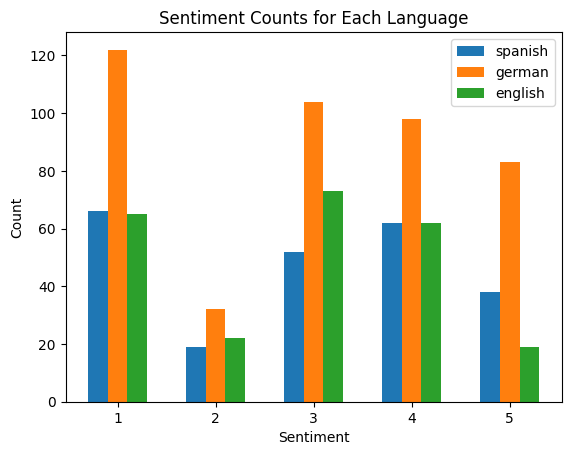

In [34]:
# Calculate the count of each sentiment category for each DataFrame
es_sentiment_counts_1 = df_es_1['sentiment'].value_counts().sort_index()
de_sentiment_counts_1 = df_de_1['sentiment'].value_counts().sort_index()
en_sentiment_counts_1 = df_en_1['sentiment'].value_counts().sort_index()

# Set the x-axis labels
sentiment_labels = ['1', '2', '3', '4', '5']
x = np.arange(len(sentiment_labels))

# Set the width of each bar
bar_width = 0.2

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the counts for each sentiment category for each DataFrame
ax.bar(x - bar_width, es_sentiment_counts_1, width=bar_width, label='spanish')
ax.bar(x, de_sentiment_counts_1, width=bar_width, label='german')
ax.bar(x + bar_width, en_sentiment_counts_1, width=bar_width, label='english')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(sentiment_labels)

# Set the plot title and labels
ax.set_title('Sentiment Counts for Each Language')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [35]:
df_combined_1 = pd.concat([df_es_1, df_en_1, df_de_1])
# Create the folder if it doesn't exist
folder_name = 'data'

# Define the file path for saving the CSV
file_name = 'data_sentiment_1.csv'
file_path = os.path.join(folder_name, file_name)

# Convert the dataframe to CSV and save it
df_combined_1.to_csv(file_path, index=False)

## data condensed

### performed on paragraphs

In [36]:
df_de_con['sentiment'] = df_de_con['data'].apply(lambda x: sentiment_score(x[:512]))
df_en_con['sentiment'] = df_en_con['data'].apply(lambda x: sentiment_score(x[:512]))
df_es_con['sentiment'] = df_es_con['data'].apply(lambda x: sentiment_score(x[:512]))

In [37]:
# Grouping the data by 'player' and calculating the mean of 'sentiment' for each player
mean_sentiment_de_con = df_de_con.groupby('player')['sentiment'].mean()
mean_sentiment_en_con = df_en_con.groupby('player')['sentiment'].mean()
mean_sentiment_es_con = df_es_con.groupby('player')['sentiment'].mean()

print('Sentiment score per player DE')
print(mean_sentiment_de_con)
print('Sentiment score per player EN')
print(mean_sentiment_en_con)
print('Sentiment score per player ES')
print(mean_sentiment_es_con)

Sentiment score per player DE
player
exequiel palacios    1.833333
jeremie frimpong     1.939130
jonathan tah         2.223529
mitchel bakker       2.000000
moussa diaby         2.058824
mykhaylo mudryk      1.111111
piero hincapie       1.646341
Name: sentiment, dtype: float64
Sentiment score per player EN
player
exequiel palacios    2.000000
jeremie frimpong     1.990291
jonathan tah         2.571429
mitchel bakker       2.545455
moussa diaby         1.862069
mykhaylo mudryk      1.750000
piero hincapie       1.458333
piero hincapié       2.250000
Name: sentiment, dtype: float64
Sentiment score per player ES
player
exequiel palacios    1.422680
jeremie frimpong     1.869565
jonathan tah         1.666667
mitchel bakker       1.545455
moussa diaby         1.193548
mykhaylo mudryk      1.148148
piero hincapie       1.800000
piero hincapié       1.698630
Name: sentiment, dtype: float64


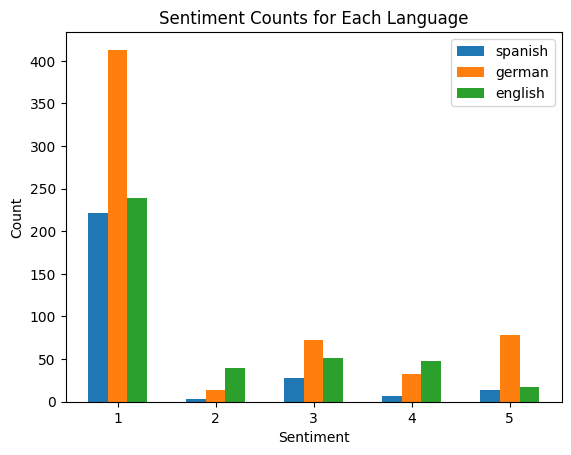

In [38]:
# Calculate the count of each sentiment category for each DataFrame
es_sentiment_counts_con = df_es_con['sentiment'].value_counts().sort_index()
de_sentiment_counts_con = df_de_con['sentiment'].value_counts().sort_index()
en_sentiment_counts_con = df_en_con['sentiment'].value_counts().sort_index()

# Set the x-axis labels
sentiment_labels = ['1', '2', '3', '4', '5']
x = np.arange(len(sentiment_labels))

# Set the width of each bar
bar_width = 0.2

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the counts for each sentiment category for each DataFrame
ax.bar(x - bar_width, es_sentiment_counts_con, width=bar_width, label='spanish')
ax.bar(x, de_sentiment_counts_con, width=bar_width, label='german')
ax.bar(x + bar_width, en_sentiment_counts_con, width=bar_width, label='english')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(sentiment_labels)

# Set the plot title and labels
ax.set_title('Sentiment Counts for Each Language')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')

# Add a legend
ax.legend()

# Show the plot
plt.show()

### performed only on sentences

In [45]:
df_de_con

,data,player,language,publishedAt,sentiment,short,sentiment2
0,trainer alonso mitgereisten fans monaco glucks...,exequiel palacios,de,2023-02-24T09:33:31Z,5,,4
1,sechser droht viereinhalb monaten pause bitter...,exequiel palacios,de,2023-03-03T21:35:13Z,1,,4
2,bayerleverkusen sechser erklart budapest spiel...,exequiel palacios,de,2023-03-07T11:34:39Z,1,,4
3,bakker mittwoch abschluss training bayerleverk...,exequiel palacios,de,2023-03-08T14:25:18Z,3,,4
4,allerdings andrich argentinischen weltmeister ...,exequiel palacios,de,2023-03-09T19:53:46Z,3,,4
...,...,...,...,...,...,...,...
605,bayerleverkusen wehrt europaleague lange gut s...,piero hincapie,de,2023-05-12T10:02:12Z,1,,4
606,alonso taktik duell alten lehrmeister mourinho...,piero hincapie,de,2023-05-11T21:17:00Z,1,,4
607,trotz pleite halbfinal hinspiel rom gibt bayer...,piero hincapie,de,2023-05-11T21:09:16Z,1,,4
608,hitzigen aufeinandertreffen stadio olimpico na...,piero hincapie,de,2023-05-11T20:58:58Z,1,,4


In [ ]:
def extract_sentence(df):
    df['short'] = ''
    
    for index, row in df.iterrows():
        player = row['player']
        data = str(row['data'])  # Convert data to string
        
        # Find the sentence containing player's information
        sentences = data.split('.')
        for sentence in sentences:
            if player.lower() in sentence.lower():
                df.at[index, 'short'] = sentence.strip()
                break
    
    return df

In [39]:
extract_sentence(df_de_con)
extract_sentence(df_en_con)
extract_sentence(df_es_con)

,data,player,language,publishedAt,sentiment,short
0,adeyemi firmo primer gol bundesliga florian wi...,exequiel palacios,es,2023-01-29T18:25:03Z,1,
1,ultima semana marzo primera ventana partidos i...,exequiel palacios,es,2023-01-30T16:52:46Z,1,
2,gustavo puerta jugara bayer leverkusen bayer l...,exequiel palacios,es,2023-01-31T20:41:38Z,1,
3,alberto fernandez presidente afa claudio chiqu...,exequiel palacios,es,2023-02-09T18:32:38Z,1,
4,alberto fernandez tambien participaron campeon...,exequiel palacios,es,2023-02-12T21:13:55Z,1,
...,...,...,...,...,...,...
268,minuto visitante habia llegado arco romano gen...,piero hincapié,es,2023-05-11T21:13:48Z,1,
269,bayer leverkusen jugo visita roma partido ida ...,piero hincapié,es,2023-05-11T20:56:21Z,1,
270,ecuatoriano volvera semifinales torneo uefa an...,piero hincapié,es,2023-05-11T18:30:25Z,1,
271,seleccion ecuador jugara dos ultimos amistosos...,piero hincapié,es,2023-05-10T23:37:55Z,1,


In [40]:
df_de_con['sentiment2'] = df_de_con['short'].apply(lambda x: sentiment_score(x[:512]))
df_en_con['sentiment2'] = df_en_con['short'].apply(lambda x: sentiment_score(x[:512]))
df_es_con['sentiment2'] = df_es_con['short'].apply(lambda x: sentiment_score(x[:512]))

In [41]:
# Grouping the data by 'player' and calculating the mean of 'sentiment' for each player
mean_sentiment_de_con_sen = df_de_con.groupby('player')['sentiment2'].mean()
mean_sentiment_en_con_sen = df_en_con.groupby('player')['sentiment2'].mean()
mean_sentiment_es_con_sen = df_es_con.groupby('player')['sentiment2'].mean()

print('Sentiment score per player DE')
print(mean_sentiment_de_con_sen)
print('Sentiment score per player EN')
print(mean_sentiment_en_con_sen)
print('Sentiment score per player ES')
print(mean_sentiment_es_con_sen)

Sentiment score per player DE
player
exequiel palacios    4.0
jeremie frimpong     4.0
jonathan tah         4.0
mitchel bakker       4.0
moussa diaby         4.0
mykhaylo mudryk      4.0
piero hincapie       4.0
Name: sentiment2, dtype: float64
Sentiment score per player EN
player
exequiel palacios    4.0
jeremie frimpong     4.0
jonathan tah         4.0
mitchel bakker       4.0
moussa diaby         4.0
mykhaylo mudryk      4.0
piero hincapie       4.0
piero hincapié       4.0
Name: sentiment2, dtype: float64
Sentiment score per player ES
player
exequiel palacios    4.0
jeremie frimpong     4.0
jonathan tah         4.0
mitchel bakker       4.0
moussa diaby         4.0
mykhaylo mudryk      4.0
piero hincapie       4.0
piero hincapié       4.0
Name: sentiment2, dtype: float64


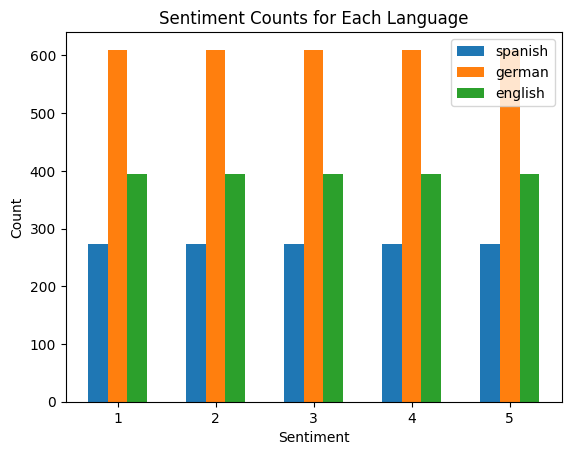

In [42]:
# Calculate the count of each sentiment category for each DataFrame
es_sentiment_counts_con_sen = df_es_con['sentiment2'].value_counts().sort_index()
de_sentiment_counts_con_sen = df_de_con['sentiment2'].value_counts().sort_index()
en_sentiment_counts_con_sen = df_en_con['sentiment2'].value_counts().sort_index()

# Set the x-axis labels
sentiment_labels = ['1', '2', '3', '4', '5']
x = np.arange(len(sentiment_labels))

# Set the width of each bar
bar_width = 0.2

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the counts for each sentiment category for each DataFrame
ax.bar(x - bar_width, es_sentiment_counts_con_sen, width=bar_width, label='spanish')
ax.bar(x, de_sentiment_counts_con_sen, width=bar_width, label='german')
ax.bar(x + bar_width, en_sentiment_counts_con_sen, width=bar_width, label='english')

# Set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(sentiment_labels)

# Set the plot title and labels
ax.set_title('Sentiment Counts for Each Language')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [43]:
df_combined_con = pd.concat([df_es_con, df_en_con, df_de_con])
df_combined_con # has both paragraph and sentence in

,data,player,language,publishedAt,sentiment,short,sentiment2
0,adeyemi firmo primer gol bundesliga florian wi...,exequiel palacios,es,2023-01-29T18:25:03Z,1,,4
1,ultima semana marzo primera ventana partidos i...,exequiel palacios,es,2023-01-30T16:52:46Z,1,,4
2,gustavo puerta jugara bayer leverkusen bayer l...,exequiel palacios,es,2023-01-31T20:41:38Z,1,,4
3,alberto fernandez presidente afa claudio chiqu...,exequiel palacios,es,2023-02-09T18:32:38Z,1,,4
4,alberto fernandez tambien participaron campeon...,exequiel palacios,es,2023-02-12T21:13:55Z,1,,4
...,...,...,...,...,...,...,...
605,bayerleverkusen wehrt europaleague lange gut s...,piero hincapie,de,2023-05-12T10:02:12Z,1,,4
606,alonso taktik duell alten lehrmeister mourinho...,piero hincapie,de,2023-05-11T21:17:00Z,1,,4
607,trotz pleite halbfinal hinspiel rom gibt bayer...,piero hincapie,de,2023-05-11T21:09:16Z,1,,4
608,hitzigen aufeinandertreffen stadio olimpico na...,piero hincapie,de,2023-05-11T20:58:58Z,1,,4


In [44]:
# Create the folder if it doesn't exist
folder_name = 'data'

# Define the file path for saving the CSV
file_name = 'data_sentiment_con.csv'
file_path = os.path.join(folder_name, file_name)

# Convert the dataframe to CSV and save it
df_combined.to_csv(file_path, index=False)